Ipython Notebooks at NERSC  
========

This notebook shows you how to run on Ipython Notebook on NERSC data using NERSC's Jupyter Hub server. 

![BMH](https://avatars3.githubusercontent.com/u/7388996?v=3&s=200)
![BMH](http://www.nersc.gov/themes/nersc-sass/images/logo.png)

# Install packages from *inside* the notebook

### Find out which anaconda executable is installed for this notebook, then run conda install or pip install as usual

In [21]:
import sys
sys.executable

'/anaconda2/bin/python'

In [22]:
!/anaconda2/bin/conda list

# packages in environment at /anaconda2:
#
abstract-rendering        0.5.1               np110py27_0  
alabaster                 0.7.8                    py27_0  
anaconda-client           1.4.0                    py27_0  
anaconda                  custom                   py27_0  
anaconda-navigator        1.1.1                    py27_0  
argcomplete               1.0.0                    py27_1  
astropy                   1.1.2               np110py27_0  
babel                     2.3.3                    py27_0  
backports                 1.0                      py27_0  
backports_abc             0.4                      py27_0  
basemap                   1.0.7               np110py27_0  
bcolz                     1.0.0                    py27_0  
beautiful-soup            4.3.2                    py27_0  
beautifulsoup4            4.4.1                    py27_0  
binstar                   0.12                          2  
biopython                 1.67                np110py27_0

In [ ]:
#!/anaconda2/bin/pip install ...
#!/anaconda2/bin/conda install ...

### Add in your own code, sys.path is equivalent to PYTHONPATH in bash

In [2]:
sys.path

['',
 '/anaconda2/lib/python27.zip',
 '/anaconda2/lib/python2.7',
 '/anaconda2/lib/python2.7/plat-linux2',
 '/anaconda2/lib/python2.7/lib-tk',
 '/anaconda2/lib/python2.7/lib-old',
 '/anaconda2/lib/python2.7/lib-dynload',
 '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/global/u2/k/kaylanb/.ipython']

# Example

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
sys.path.append('/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py')
sys.path

['',
 '/anaconda2/lib/python27.zip',
 '/anaconda2/lib/python2.7',
 '/anaconda2/lib/python2.7/plat-linux2',
 '/anaconda2/lib/python2.7/lib-tk',
 '/anaconda2/lib/python2.7/lib-old',
 '/anaconda2/lib/python2.7/lib-dynload',
 '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/global/u2/k/kaylanb/.ipython',
 '/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py',
 '/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py']

## Decals_BassMzls

In [8]:
from legacyanalysis.validation.combine_cats import get_matched_dataset
import legacyanalysis.validation.common_plots as plots

In [16]:
indir='/project/projectdirs/desi/users/burleigh/theValidator_root/input_data/bass-mosaic-decals'
decam=os.path.join(indir,'decam.txt')
bass_mzls=os.path.join(indir,'bassmos.txt')
d= get_matched_dataset(decam, bass_mzls, \
                       comparison='bmd',debug=False)

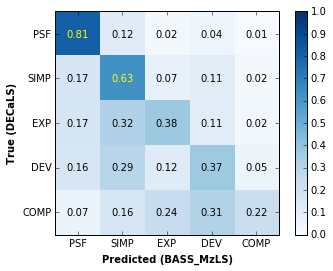

In [17]:
d.apply_cut(['clean'])
plots.confusion_matrix(d.ref.data['tractor'],d.test.data['tractor'],\
                       ref_name='DECaLS',test_name='BASS_MzLS',show=True)

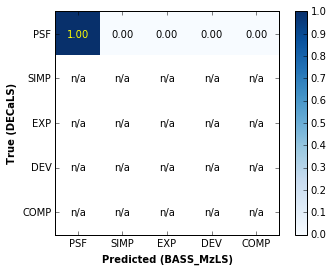

In [29]:
d.apply_cut(['clean','psf'])
plots.confusion_matrix(d.ref.data['tractor'],d.test.data['tractor'],\
                       ref_name='DECaLS',test_name='BASS_MzLS',show=True)

## Decals Cosmos Subsets

In [18]:
from legacyanalysis.validation.cosmos_demo import cosmos_plots

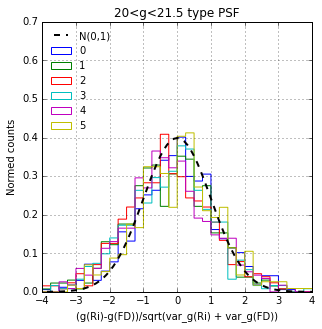

In [19]:
cosmos_plots(show=True)